# Worksheet 19

Name: Mahdi Khemakhem
UID: U18251472

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9957545656315917
0.9957610084437424
0.995779713278975
0.9958820529465581
0.9958893270375526
0.996023707310267
0.9960270873023901
0.9960830050145973
0.9960978587293311
0.9961441187708127
0.9961441335859845
0.996180489457121
0.99618628246121
0.9962001673800391


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.31249999999999983
[0, 0, 1, 1, 0]
0.31249999999999983


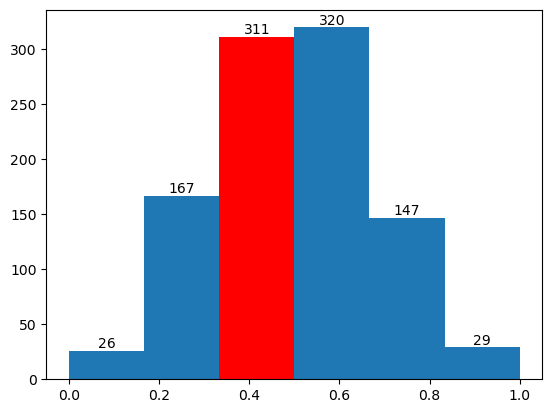

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

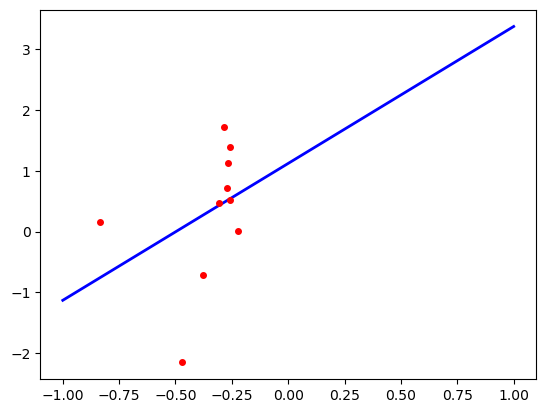

In [4]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = np.random.randn(SAMPLE_SIZE)  # Pure random noise for y

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y

xplot = np.linspace(-1,1,20)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

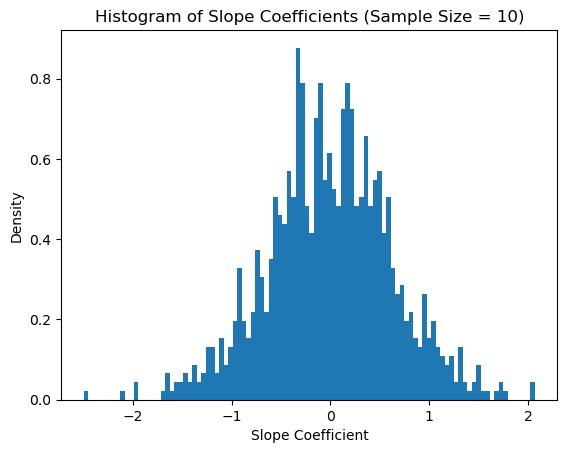

In [5]:
beta_hist = []
# Number of simulations
n_simulations = 1000
# Sample size for each dataset
sample_size = 10

# Generating 1000 independent datasets and computing the slope coefficient for each
for _ in range(n_simulations):
    xlin = -1.0 + 2.0 * np.random.random(sample_size)  # Random x values between -1 and 1
    y = np.random.randn(sample_size)  # Random noise for y
    intercept = np.ones(sample_size)
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    beta_hist.append(beta[1])  # Storing the slope coefficient

# Plotting the histogram of the slope coefficients
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_title('Histogram of Slope Coefficients (Sample Size = 10)')
ax.set_xlabel('Slope Coefficient')
ax.set_ylabel('Density')
plt.show()

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

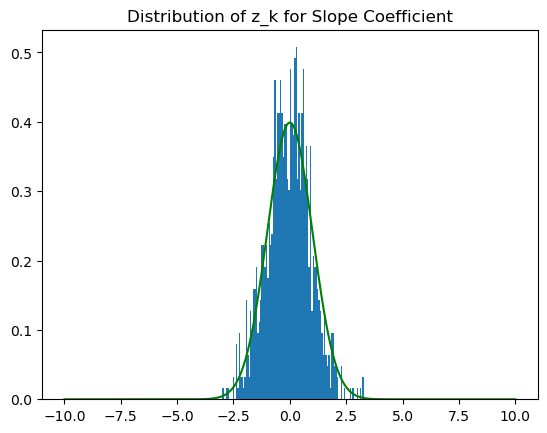

In [6]:
from scipy.stats import norm

beta_hist = []
# Number of simulations
n_simulations = 1000
# Sample size for each dataset
sample_size = 100

# Initialize the list to store the z_k values for the slope coefficient
z_slope_hist = []

# Generating 1000 independent datasets and computing z_k for the slope coefficient
for _ in range(n_simulations):
    xlin = -1.0 + 2.0 * np.random.random(sample_size)  # Random x values between -1 and 1
    y = np.random.randn(sample_size)  # Random noise for y
    intercept = np.ones(sample_size)
    X = np.array([intercept, xlin]).T

    # Calculating beta
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    hat_beta_k = beta[1]  # Slope coefficient

    # Calculating S_kk
    S_kk = np.linalg.inv(X.T @ X)[1, 1]

    # Calculating z_k for the slope
    z_k = hat_beta_k / np.sqrt(S_kk)
    z_slope_hist.append(z_k)

# Plotting the histogram and the standard normal pdf for the slope
xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(z_slope_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs), color='green')
ax.set_title('Distribution of z_k for Slope Coefficient')
plt.show()

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

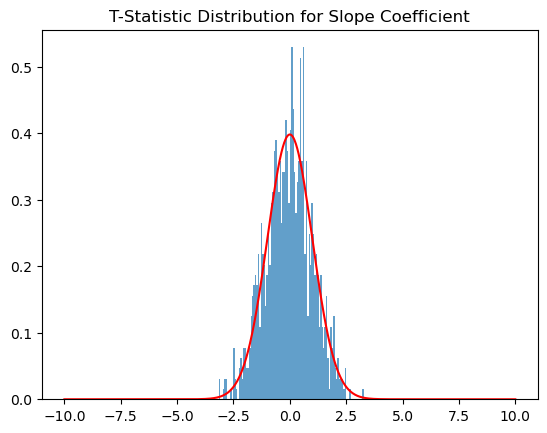

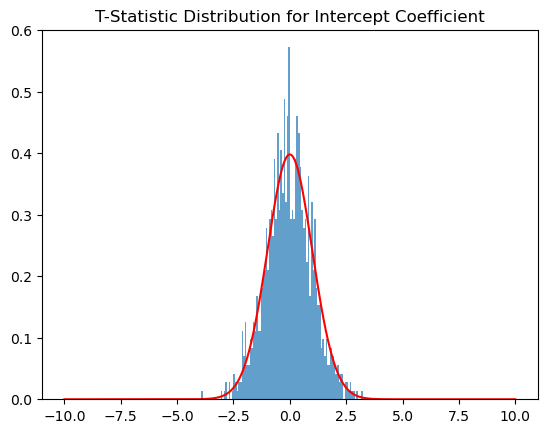

In [7]:
from scipy.stats import t

def standard_error(ytrue, ypred, p):
    """
    Calculate the standard error.
    ytrue: Array of true y values.
    ypred: Array of predicted y values from the regression.
    p: Number of parameters in the model.
    """
    n = len(ytrue)
    rss = np.sum((ytrue - ypred) ** 2)
    return np.sqrt(rss / (n - p))

# Number of simulations
n_simulations = 1000
# Sample size for each dataset
sample_size = 100
# Number of parameters (slope and intercept)
p = 2

# Initialize lists to store t-statistics for slope and intercept
t_slope_hist = []
t_intercept_hist = []

# Generating 1000 independent datasets and computing the t-statistics
for _ in range(n_simulations):
    xlin = -1.0 + 2.0 * np.random.random(sample_size)  # Random x values between -1 and 1
    y = np.random.randn(sample_size)  # Random noise for y
    intercept = np.ones(sample_size)
    X = np.array([intercept, xlin]).T

    # Calculating beta and predicted y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    ypred = X @ beta

    # Calculating standard error
    se = standard_error(y, ypred, p)

    # Calculating S_kk (for slope and intercept)
    S_kk_slope = np.linalg.inv(X.T @ X)[1, 1]
    S_kk_intercept = np.linalg.inv(X.T @ X)[0, 0]

    # Calculating t-statistics
    t_slope = beta[1] / (se * np.sqrt(S_kk_slope))
    t_intercept = beta[0] / (se * np.sqrt(S_kk_intercept))
    t_slope_hist.append(t_slope)
    t_intercept_hist.append(t_intercept)

# Degrees of freedom
df = sample_size - p

# Preparing to plot histograms and t-distribution PDFs
xs = np.linspace(-10, 10, 1000)
t_pdf = t.pdf(xs, df)

# Plotting for the slope
fig, ax = plt.subplots()
ax.hist(t_slope_hist, bins=100, density=True, alpha=0.7)
ax.plot(xs, t_pdf, color='red')
ax.set_title('T-Statistic Distribution for Slope Coefficient')
plt.show()

# Plotting for the intercept
fig, ax = plt.subplots()
ax.hist(t_intercept_hist, bins=100, density=True, alpha=0.7)
ax.plot(xs, t_pdf, color='red')
ax.set_title('T-Statistic Distribution for Intercept Coefficient')
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


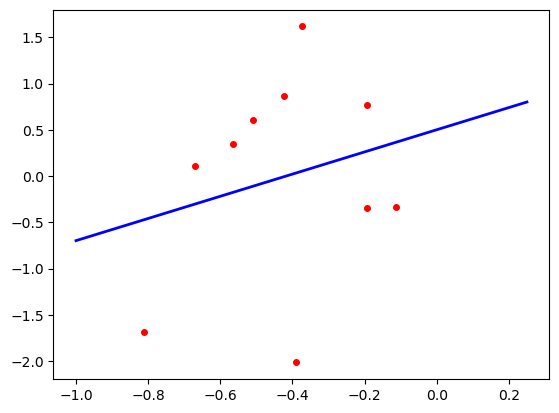

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [10]:
import scipy.stats as stats

y_pred = X @ beta_hat

# Calculate residuals and RSS
residuals = y - y_pred
RSS = np.sum(residuals**2)

# Number of parameters (p) is 2 because we have slope and intercept
p = 2
n = len(y)  # number of observations

# Calculate the standard error for the slope
XtX_inv = np.linalg.inv(X.T @ X)
SE_beta1 = np.sqrt(RSS / (n - p) * XtX_inv[1, 1])

# Calculate the t-statistic for the slope
t_statistic = beta_hat[1] / SE_beta1

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n - p))

beta_hat, SE_beta1, t_statistic, p_value

(array([0.50155603, 1.19902827]),
 1.7523026381576572,
 0.6842586696389723,
 0.5131420720905755)